#Gaussian Processes

In [2]:
import numpy as np
import matplotlib.pyplot as plt

1.The Box-Mueller method.

<ipython-input-48-cfea86338fc6>:4: RuntimeWarning: invalid value encountered in log
  Z1=np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
<ipython-input-48-cfea86338fc6>:4: RuntimeWarning: invalid value encountered in sqrt
  Z1=np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
<ipython-input-48-cfea86338fc6>:5: RuntimeWarning: invalid value encountered in log
  Z2=np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
<ipython-input-48-cfea86338fc6>:5: RuntimeWarning: invalid value encountered in sqrt
  Z2=np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)


[        nan         nan  0.75075189 ...         nan -0.73351683
  0.53963921]
nan


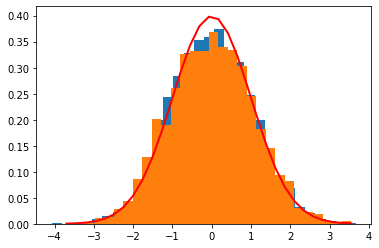

In [48]:
n=10000
U1=np.random.standard_normal(n)
U2=np.random.standard_normal(n)
Z1=np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
Z2=np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
count, bins, ignored = plt.hist(Z1, 30, density=True)
#plt.hist(Z2,bins=bins)
count, bins, ignored = plt.hist(Z2, 30, density=True)
plt.plot(bins,(1/np.sqrt(2*np.pi))*np.exp(-bins**2/2),linewidth=2, color='r')
E=0
for i in range(n):
  if Z1[i]=="nan" or Z2[i]=="nan":
    continue
  E+=float(1/n*(Z1[i]*Z2[i]))
print(E)
plt.show()

2.Brownian Motion

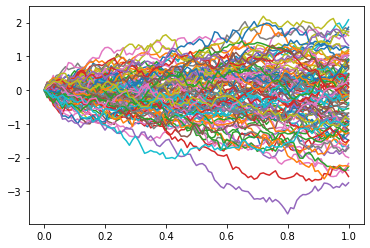

In [227]:
n=100
def brown(n,Z):
  a=(1/100)*np.array([[min(i+1,j+1) for i in range(n)] for j in range(n)])
  c=np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      if i==j:
        c[i][j]=i+1
  cov=a-np.diag(np.diag(a))+(1/100)*c
  A=np.linalg.cholesky(cov)
  
  B=A@Z
  
  B=np.insert(B,0,np.zeros(n,int),axis=0)
  return B
t=np.linspace(0,1,101)
Z=np.random.standard_normal((n,n))
plt.plot(t,brown(n,Z))


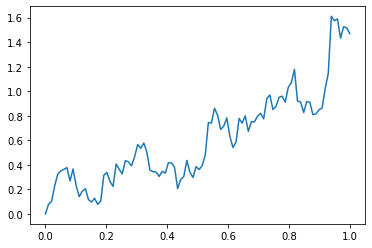

In [99]:
Z1=np.random.standard_normal(n-1)
Z1=np.insert(Z1,0,0)
B1=A@Z1
plt.plot(t,B1)


3.Simulating the Ornstein-Uhlenbeck process

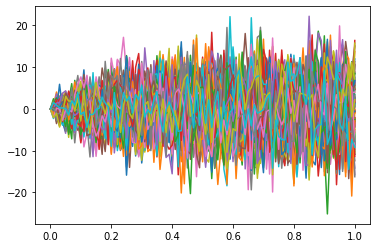

In [114]:
cov =np.zeros((n,n))
for i in range(n):
  for j in range(n):
    cov[i][j]=(np.exp(-2*np.linalg.norm(i-j))/2*100)*(1-np.exp(-2*min(i+1,j+1)/100))
A=np.linalg.cholesky(cov)
Z=np.random.standard_normal((n,n))
Y=A@Z
t=np.linspace(0,1,101)
Y=np.insert(Y,0,np.zeros(n,int),axis=0)
plt.plot(t,Y)

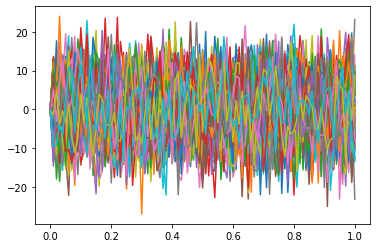

In [115]:
cov =np.zeros((n,n))
for i in range(n):
  for j in range(n):
    cov[i][j]=(np.exp(-2*np.linalg.norm(i-j))/2*100)
A=np.linalg.cholesky(cov)
Z=np.random.standard_normal((n,n))
Y=A@Z
t=np.linspace(0,1,101)
N=np.random.normal(0,np.sqrt(0.5),n)
Y=np.insert(Y,0,N,axis=0)
plt.plot(t,Y)

4.Simulating fractional Brownian motion

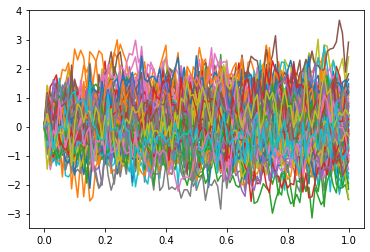

In [122]:
def f(h,t,s):
  return 0.5*(t**(2*h)+s**(2*h)-np.linalg.norm(t-s)**(2*h))

def g(h):
  cov=np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      cov[i][j]=f(h,(i+1)/100,(j+1)/100)
  A=np.linalg.cholesky(cov)
  Z=np.random.standard_normal((n,n))
  BY=A@Z
  t=np.linspace(0,1,101)
  BY=np.insert(BY,0,np.zeros(n),axis=0)
  plt.plot(t,BY)
g(0.1)

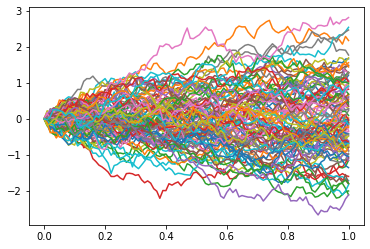

In [123]:
g(0.5)

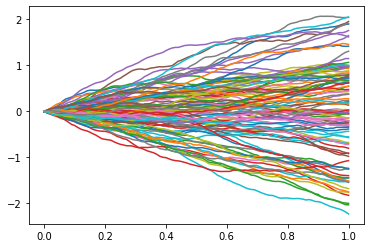

In [124]:
g(0.9)

5.Simulating the Brownian bridge

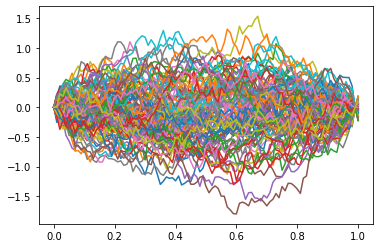

In [242]:
cov2=np.zeros((n-1,n-1))
for i in range(n-1):
  for j in range(n-1):
    cov2[i][j]=((min(i,j)+1)/100)*(1-max(i+1,j+1)/100)

A=np.linalg.cholesky(cov2)
np.random.seed(0)
Z1=np.random.standard_normal((n,n))
Z2=Z1[:n-1,:n-1]
B=A@Z2
B=np.insert(B,n-2,np.zeros(n-1),axis=0)
B=np.insert(B,0,np.zeros(n-1),axis=0)
t=np.linspace(0,1,101)
plt.plot(t,B)

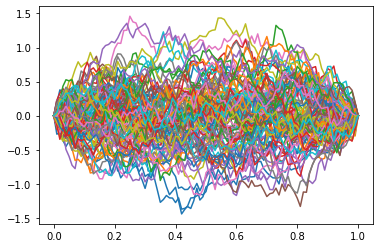

In [243]:
B1=brown(n,Z1)
Z=np.zeros((n+1,n))
for i in range (n+1):
  for j in range(n):
    Z[i,j]=B1[i,j]-(i/100)*B1[n,j]

t=np.linspace(0,1,101)
plt.plot(t,Z)

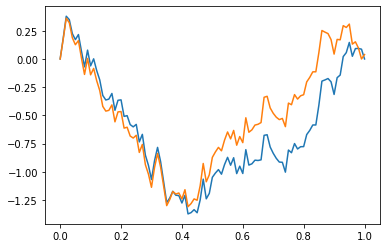

In [246]:

A1=Z[:,0]
A2=B[:,0]
plt.plot(t,A1)
plt.plot(t,A2)
